<a href="https://colab.research.google.com/github/github-code12/Credit_Card_Fraud_Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Mlp dataset.csv')
print(data)

       User  Card  Year  Month  Day   Time   Amount           Use_Chip  \
0         0     0  2002      9    1  06:21  $134.09  Swipe Transaction   
1         0     0  2002      9    1  06:42   $38.48  Swipe Transaction   
2         0     0  2002      9    2  06:22  $120.34  Swipe Transaction   
3         0     0  2002      9    2  17:45  $128.95  Swipe Transaction   
4         0     0  2002      9    3  06:23  $104.71  Swipe Transaction   
...     ...   ...   ...    ...  ...    ...      ...                ...   
19958     0     4  2009      2   12  13:03    $9.71  Swipe Transaction   
19959     0     4  2009      2   22  11:58   $27.94  Swipe Transaction   
19960     0     4  2009      2   24  16:53   $13.97  Swipe Transaction   
19961     0     4  2009      3   29  16:30   $14.27  Swipe Transaction   
19962     0     4  2009      3   31  13:17   $13.55  Swipe Transaction   

       Merchant_Name  Merchant_City Merchant_State      Zip   MCC  \
0       3.527210e+18       La Verne       

In [ ]:
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3.527210e+18,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-7.280000e+17,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-7.280000e+17,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3.414530e+18,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5.817220e+18,La Verne,CA,91750.0,5912,NaN,No


In [ ]:
data.tail()

,User,Card,Year,Month,Day,Time,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud
19958,0,4,2009,2,12,13:03,$9.71,Swipe Transaction,4.060650e+18,La Verne,CA,91750.0,5411,Technical Glitch,No
19959,0,4,2009,2,22,11:58,$27.94,Swipe Transaction,-8.130000e+18,La Verne,CA,91750.0,5211,NaN,No
19960,0,4,2009,2,24,16:53,$13.97,Swipe Transaction,5.474320e+18,Hawthorne,CA,90250.0,5912,NaN,No
19961,0,4,2009,3,29,16:30,$14.27,Swipe Transaction,4.060650e+18,La Verne,CA,91750.0,5411,NaN,No
19962,0,4,2009,3,31,13:17,$13.55,Swipe Transaction,-4.930000e+18,Beijing,China,NaN,5812,NaN,No


In [ ]:
data.shape

(19963, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            19963 non-null  int64  
 1   Card            19963 non-null  int64  
 2   Year            19963 non-null  int64  
 3   Month           19963 non-null  int64  
 4   Day             19963 non-null  int64  
 5   Time            19963 non-null  object 
 6   Amount          19963 non-null  object 
 7   Use_Chip        19963 non-null  object 
 8   Merchant_Name   19963 non-null  float64
 9   Merchant_City   19963 non-null  object 
 10  Merchant_State  18646 non-null  object 
 11  Zip             18316 non-null  float64
 12  MCC             19963 non-null  int64  
 13  Errors          574 non-null    object 
 14  Is_Fraud        19963 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 2.3+ MB


In [ ]:
data['Is_Fraud'].value_counts()

Is_Fraud
No     19936
Yes       27
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

User                  0
Card                  0
Year                  0
Month                 0
Day                   0
Time                  0
Amount                0
Use_Chip              0
Merchant_Name         0
Merchant_City         0
Merchant_State     1317
Zip                1647
MCC                   0
Errors            19389
Is_Fraud              0
dtype: int64

In [ ]:
data=data.drop(labels=['Errors'],axis=1)

In [ ]:
data.shape

(19963, 14)

In [ ]:
data.isnull().sum()

User                 0
Card                 0
Year                 0
Month                0
Day                  0
Time                 0
Amount               0
Use_Chip             0
Merchant_Name        0
Merchant_City        0
Merchant_State    1317
Zip               1647
MCC                  0
Is_Fraud             0
dtype: int64

<ipython-input-51-e0011b70b3bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Zip)


<Axes: xlabel='Zip', ylabel='Density'>

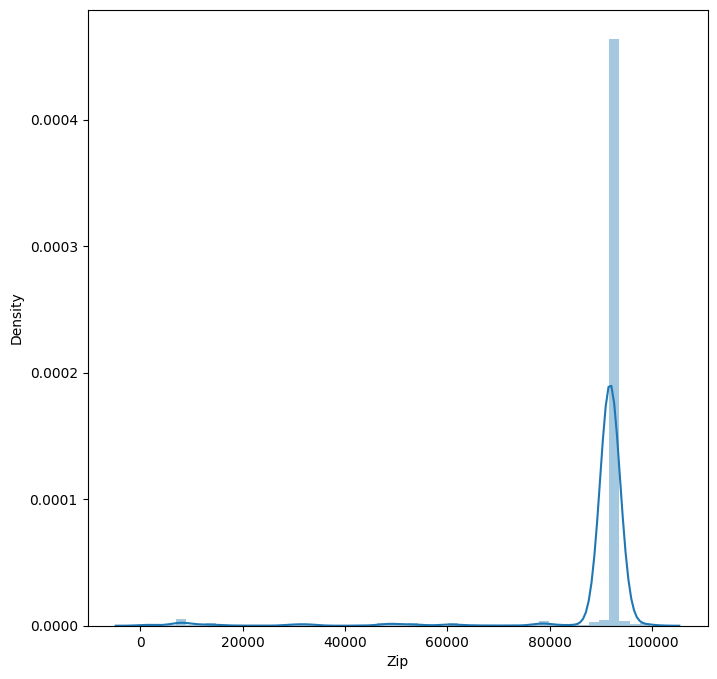

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(data.Zip)

In [ ]:
data['Zip'].fillna(data['Zip'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

User                 0
Card                 0
Year                 0
Month                0
Day                  0
Time                 0
Amount               0
Use_Chip             0
Merchant_Name        0
Merchant_City        0
Merchant_State    1317
Zip                  0
MCC                  0
Is_Fraud             0
dtype: int64

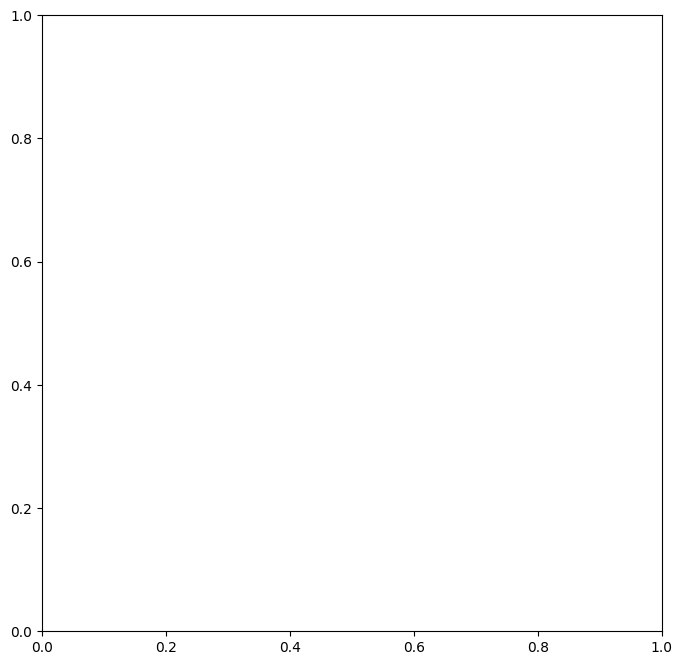

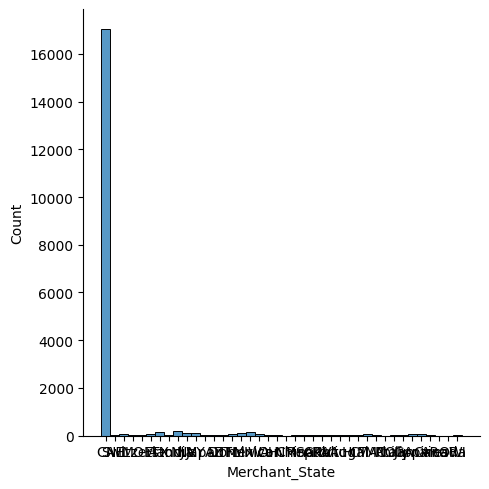

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.displot(data.Merchant_State)

In [ ]:
data['Merchant_State'].fillna(data['Merchant_State'].mode,inplace=True)

In [ ]:
data.isnull().sum()

User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use_Chip          0
Merchant_Name     0
Merchant_City     0
Merchant_State    0
Zip               0
MCC               0
Is_Fraud          0
dtype: int64

In [ ]:
# Replacing values in the "Is Fraud?" column
data['Is_Fraud']=data['Is_Fraud'].map({'No':0,'Yes':1})

In [ ]:
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Is_Fraud
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3.527210e+18,La Verne,CA,91750.0,5300,0
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-7.280000e+17,Monterey Park,CA,91754.0,5411,0
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-7.280000e+17,Monterey Park,CA,91754.0,5411,0
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3.414530e+18,Monterey Park,CA,91754.0,5651,0
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5.817220e+18,La Verne,CA,91750.0,5912,0


In [ ]:
data['Amount']=data['Amount'].str.replace('$','').astype(float)

In [ ]:
categorical_cols=["Use_Chip","Merchant_City","Merchant_State"]
target_encoded={}
for col in categorical_cols:
  encoding=data.groupby(col)["Is_Fraud"].mean().to_dict()
  data[col+"_encoded"]=data[col].map(encoding)
  target_encoded=encoding

In [ ]:
data=data.drop(columns=categorical_cols)

In [ ]:
data.head()

,User,Card,Year,Month,Day,Time,Amount,Merchant_Name,Zip,MCC,Is_Fraud,Use_Chip_encoded,Merchant_City_encoded,Merchant_State_encoded
0,0,0,2002,9,1,06:21,134.09,3.527210e+18,91750.0,5300,0,0.000694,0.000092,0.000705
1,0,0,2002,9,1,06:42,38.48,-7.280000e+17,91754.0,5411,0,0.000694,0.000000,0.000705
2,0,0,2002,9,2,06:22,120.34,-7.280000e+17,91754.0,5411,0,0.000694,0.000000,0.000705
3,0,0,2002,9,2,17:45,128.95,3.414530e+18,91754.0,5651,0,0.000694,0.000000,0.000705
4,0,0,2002,9,3,06:23,104.71,5.817220e+18,91750.0,5912,0,0.000694,0.000092,0.000705


In [ ]:
data[['Hours','Minutes']]=data['Time'].str.split(':',expand=True)
data['Hours']=pd.to_numeric(data['Hours'])
data['Minutes']=pd.to_numeric(data['Minutes'])
data=data.drop(columns='Time')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User                    19963 non-null  int64  
 1   Card                    19963 non-null  int64  
 2   Year                    19963 non-null  int64  
 3   Month                   19963 non-null  int64  
 4   Day                     19963 non-null  int64  
 5   Amount                  19963 non-null  float64
 6   Merchant_Name           19963 non-null  float64
 7   Zip                     19963 non-null  float64
 8   MCC                     19963 non-null  int64  
 9   Is_Fraud                19963 non-null  int64  
 10  Use_Chip_encoded        19963 non-null  float64
 11  Merchant_City_encoded   19963 non-null  float64
 12  Merchant_State_encoded  19963 non-null  float64
 13  Hours                   19963 non-null  int64  
 14  Minutes                 19963 non-null

In [ ]:
data.head()

,User,Card,Year,Month,Day,Amount,Merchant_Name,Zip,MCC,Is_Fraud,Use_Chip_encoded,Merchant_City_encoded,Merchant_State_encoded,Hours,Minutes
0,0,0,2002,9,1,134.09,3.527210e+18,91750.0,5300,0,0.000694,0.000092,0.000705,6,21
1,0,0,2002,9,1,38.48,-7.280000e+17,91754.0,5411,0,0.000694,0.000000,0.000705,6,42
2,0,0,2002,9,2,120.34,-7.280000e+17,91754.0,5411,0,0.000694,0.000000,0.000705,6,22
3,0,0,2002,9,2,128.95,3.414530e+18,91754.0,5651,0,0.000694,0.000000,0.000705,17,45
4,0,0,2002,9,3,104.71,5.817220e+18,91750.0,5912,0,0.000694,0.000092,0.000705,6,23


In [ ]:
correlations=data.corr()['Is_Fraud'].drop('Is_Fraud')
sorted=correlations.abs().sort_values(ascending=False)

In [ ]:
print(sorted)

Merchant_City_encoded     0.549257
Merchant_State_encoded    0.072769
Use_Chip_encoded          0.072718
MCC                       0.034954
Month                     0.029656
Merchant_Name             0.013005
Card                      0.012763
Year                      0.011253
Hours                     0.008078
Zip                       0.007838
Amount                    0.006111
Minutes                   0.003918
Day                       0.001717
User                           NaN
Name: Is_Fraud, dtype: float64


In [ ]:
data=data.drop(columns='User')
data.head()

,Card,Year,Month,Day,Amount,Merchant_Name,Zip,MCC,Is_Fraud,Use_Chip_encoded,Merchant_City_encoded,Merchant_State_encoded,Hours,Minutes
0,0,2002,9,1,134.09,3.527210e+18,91750.0,5300,0,0.000694,0.000092,0.000705,6,21
1,0,2002,9,1,38.48,-7.280000e+17,91754.0,5411,0,0.000694,0.000000,0.000705,6,42
2,0,2002,9,2,120.34,-7.280000e+17,91754.0,5411,0,0.000694,0.000000,0.000705,6,22
3,0,2002,9,2,128.95,3.414530e+18,91754.0,5651,0,0.000694,0.000000,0.000705,17,45
4,0,2002,9,3,104.71,5.817220e+18,91750.0,5912,0,0.000694,0.000092,0.000705,6,23


In [ ]:
data[['Merchant_City_encoded','Merchant_State_encoded','Use_Chip_encoded','MCC','Month']]

,Merchant_City_encoded,Merchant_State_encoded,Use_Chip_encoded,MCC,Month
0,0.000092,0.000705,0.000694,5300,9
1,0.000000,0.000705,0.000694,5411,9
2,0.000000,0.000705,0.000694,5411,9
3,0.000000,0.000705,0.000694,5651,9
4,0.000092,0.000705,0.000694,5912,9
...,...,...,...,...,...
19958,0.000092,0.000705,0.000694,5411,2
19959,0.000092,0.000705,0.000694,5211,2
19960,0.000000,0.000705,0.000694,5912,2
19961,0.000092,0.000705,0.000694,5411,3


In [ ]:
# Selecting only the fraudulent samples
fraudulent_samples = data[data['Is_Fraud'] == 1]

# Duplicate the fraudulent samples to increase their representation in the dataset
oversampled_data = pd.concat([data, fraudulent_samples], ignore_index=True)

# Shuffle the oversampled dataset to mix original and duplicated samples
oversampled_data = oversampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
oversampled_data.shape

(19990, 14)

In [ ]:
corr_matrix=oversampled_data[['Merchant_City_encoded','Merchant_State_encoded','Use_Chip_encoded','MCC','Month']].corr()
print(corr_matrix)

                        Merchant_City_encoded  Merchant_State_encoded  \
Merchant_City_encoded                1.000000                0.095045   
Merchant_State_encoded               0.095045                1.000000   
Use_Chip_encoded                     0.095204                0.995713   
MCC                                 -0.059303               -0.117810   
Month                                0.013557               -0.001265   

                        Use_Chip_encoded       MCC     Month  
Merchant_City_encoded           0.095204 -0.059303  0.013557  
Merchant_State_encoded          0.995713 -0.117810 -0.001265  
Use_Chip_encoded                1.000000 -0.130322 -0.000546  
MCC                            -0.130322  1.000000 -0.002026  
Month                          -0.000546 -0.002026  1.000000  


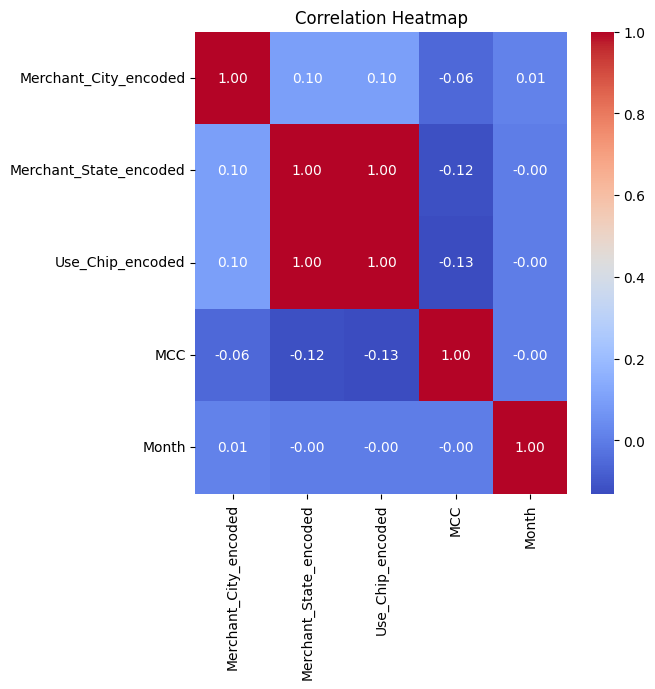

In [ ]:
# Create a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
oversampled_data=oversampled_data.drop(labels=['Use_Chip_encoded'],axis=1)

In [ ]:
oversampled_data.head()

,Card,Year,Month,Day,Amount,Merchant_Name,Zip,MCC,Is_Fraud,Merchant_City_encoded,Merchant_State_encoded,Hours,Minutes
0,2,2011,12,27,108.95,-2.450000e+17,91750.0,5311,0,0.000092,0.000705,6,18
1,2,2004,5,22,-92.00,-1.290000e+18,91750.0,5499,0,0.000092,0.000705,13,12
2,0,2007,9,10,136.38,-7.280000e+17,91754.0,5411,0,0.000000,0.000705,6,49
3,2,2013,5,23,44.60,-7.280000e+17,91754.0,5411,0,0.000000,0.000705,6,49
4,3,2006,10,1,90.30,-5.020000e+18,91752.0,5812,0,0.000000,0.000705,20,17


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(oversampled_data[['Merchant_City_encoded','Merchant_State_encoded','MCC','Month']],oversampled_data.Is_Fraud,test_size=0.3,random_state=42)

In [ ]:
#fitting the model to training data
from sklearn.tree import DecisionTreeClassifier
mytreemodel=DecisionTreeClassifier()
mytreemodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
ypred=mytreemodel.predict(xtest)
print(ypred)

[0 0 0 ... 0 0 0]


In [ ]:
mytreemodel.predict_proba(xtest)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(ytest,ypred)
print(conf_matrix)

[[5984    0]
 [   2   11]]


In [ ]:
#Report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5984
           1       1.00      0.85      0.92        13

    accuracy                           1.00      5997
   macro avg       1.00      0.92      0.96      5997
weighted avg       1.00      1.00      1.00      5997

